In [ ]:
import sys
sys.path.append('../raft/')

from torchview import draw_graph
from torchinfo import summary

from core.extractor import BasicEncoder, ResidualBlock, BottleneckBlock

In [47]:
residual_block = ResidualBlock(32, 32)
summary(residual_block, input_size=(4, 32, 100, 100))

Layer (type:depth-idx)                   Output Shape              Param #
ResidualBlock                            [4, 32, 100, 100]         --
├─Conv2d: 1-1                            [4, 32, 100, 100]         9,248
├─GroupNorm: 1-2                         [4, 32, 100, 100]         64
├─ReLU: 1-3                              [4, 32, 100, 100]         --
├─Conv2d: 1-4                            [4, 32, 100, 100]         9,248
├─GroupNorm: 1-5                         [4, 32, 100, 100]         64
├─ReLU: 1-6                              [4, 32, 100, 100]         --
├─ReLU: 1-7                              [4, 32, 100, 100]         --
Total params: 18,624
Trainable params: 18,624
Non-trainable params: 0
Total mult-adds (M): 739.84
Input size (MB): 5.12
Forward/backward pass size (MB): 40.96
Params size (MB): 0.07
Estimated Total Size (MB): 46.15

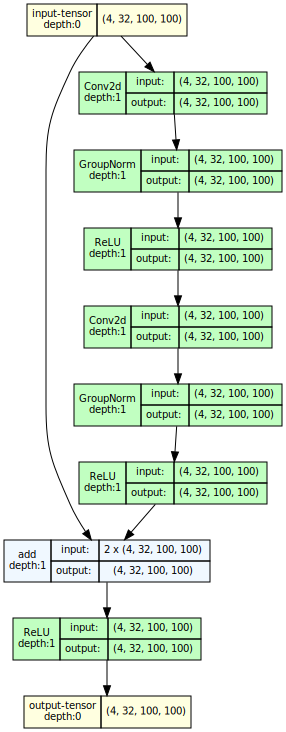

In [49]:
model_graph = draw_graph(residual_block, 
    input_size=((4, 32, 100, 100)), 
    device='cuda')
model_graph.visual_graph

In [50]:
bottleneck_block = BottleneckBlock(32, 32)
summary(bottleneck_block, input_size=(4, 32, 100, 100))

Layer (type:depth-idx)                   Output Shape              Param #
BottleneckBlock                          [4, 32, 100, 100]         --
├─Conv2d: 1-1                            [4, 8, 100, 100]          264
├─GroupNorm: 1-2                         [4, 8, 100, 100]          16
├─ReLU: 1-3                              [4, 8, 100, 100]          --
├─Conv2d: 1-4                            [4, 8, 100, 100]          584
├─GroupNorm: 1-5                         [4, 8, 100, 100]          16
├─ReLU: 1-6                              [4, 8, 100, 100]          --
├─Conv2d: 1-7                            [4, 32, 100, 100]         288
├─GroupNorm: 1-8                         [4, 32, 100, 100]         64
├─ReLU: 1-9                              [4, 32, 100, 100]         --
├─ReLU: 1-10                             [4, 32, 100, 100]         --
Total params: 1,232
Trainable params: 1,232
Non-trainable params: 0
Total mult-adds (M): 45.44
Input size (MB): 5.12
Forward/backward pass size (MB): 30

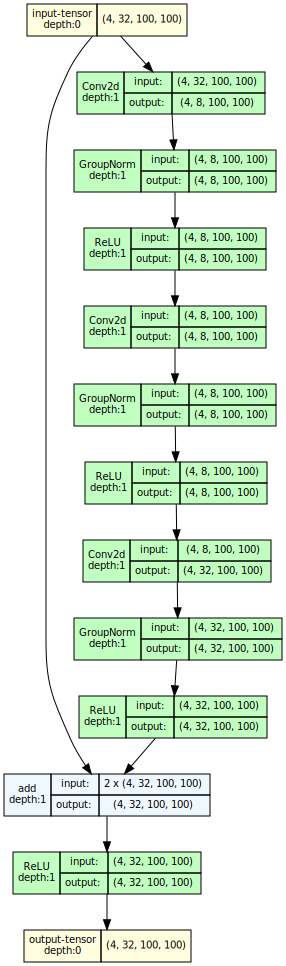

In [51]:
model_graph = draw_graph(bottleneck_block, input_size=((4, 32, 100, 100)), device='cuda')
model_graph.resize_graph(scale=5)
model_graph.visual_graph

In [52]:
encoder = BasicEncoder()
summary(encoder, input_size=(4, 3, 288, 960))

Layer (type:depth-idx)                   Output Shape              Param #
BasicEncoder                             [4, 128, 36, 120]         --
├─Conv2d: 1-1                            [4, 64, 144, 480]         9,472
├─BatchNorm2d: 1-2                       [4, 64, 144, 480]         128
├─ReLU: 1-3                              [4, 64, 144, 480]         --
├─Sequential: 1-4                        [4, 64, 144, 480]         --
│    └─ResidualBlock: 2-1                [4, 64, 144, 480]         --
│    │    └─Conv2d: 3-1                  [4, 64, 144, 480]         36,928
│    │    └─BatchNorm2d: 3-2             [4, 64, 144, 480]         128
│    │    └─ReLU: 3-3                    [4, 64, 144, 480]         --
│    │    └─Conv2d: 3-4                  [4, 64, 144, 480]         36,928
│    │    └─BatchNorm2d: 3-5             [4, 64, 144, 480]         128
│    │    └─ReLU: 3-6                    [4, 64, 144, 480]         --
│    │    └─ReLU: 3-7                    [4, 64, 144, 480]         --
│

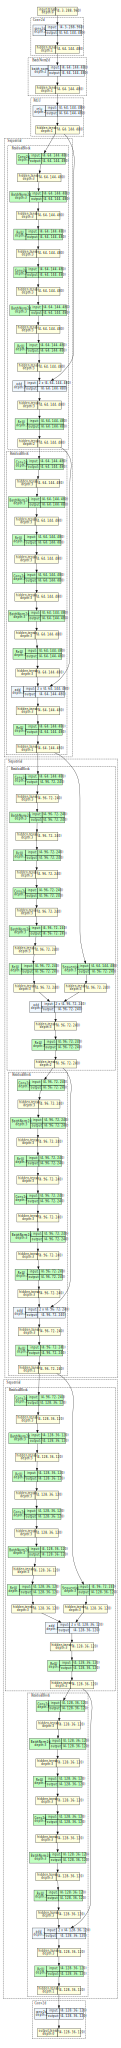

In [53]:
model_graph = draw_graph(encoder, 
    input_size=((4, 3, 288, 960)), 
    device='cuda', 
    graph_name='BasicEncoder', 
    hide_inner_tensors=False, 
    hide_module_functions=False, 
    expand_nested=True)
model_graph.resize_graph(scale=5)
model_graph.visual_graph